In [2]:
result

NameError: name 'result' is not defined

In [3]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')
import requests
from lxml import etree

from datetime import datetime, timezone
from zoneinfo import ZoneInfo
now_utc = datetime.now(timezone.utc)
now_tokyo = datetime.now(ZoneInfo("Asia/Tokyo"))

now_utc_query=now_utc.strftime('%Y-%m-%dT%H')
now_tokyo_query=now_tokyo.strftime('%Y-%m-%dT%H')


#fileName = r"C:\パス\Google検索年間ボリューム一覧.csv"

#タイムゾーンとキーワード設定
#pytrends = TrendReq(hl='ja-JP', tz=540)
pytrends = TrendReq()

kw_list =["buy bitcoin", "btc usd","coinbase","bitcoin crash"]
#kw_list =["buy bitcoin", "btc usd","coinbase","bitcoin crash"]


pytrends.build_payload(kw_list, cat=0, timeframe=now_utc_query + ' ' + now_tokyo_query, geo='JP', gprop='')

#データ取得
df = pytrends.interest_over_time()
 
#取得データをグラフ化
#df.plot(figsize=(15, 3), lw=.7)

for kw in kw_list:
   google_r = requests.get("http://www.google.com/complete/search",
                 params={'q':kw,
                         'hl':'ja',
                         'ie':'utf_8',
                         'oe':'utf_8',
                         'output': 'toolbar'})

   google_root = etree.XML(google_r.text)
   google_sugs = google_root.xpath("//suggestion")
   google_sugstrs = [s.get("data") for s in google_sugs]

   google_suglist = []

#   for ss in google_sugstrs:
#       google_suglist.append(ss)
#       print(ss)

#When btc usd(already invested) is higher than coinbase(beginners)

#There are several keywords that reflect the current crypto market sentiment quite good. 
#We picked "buy bitcoin" for a measurement of market newcomers and 
#"btc usd" for already invested people that are interested in the current price movements (mostly non-HODLers). 
#The keyword "coinbase" reflects newcomers as well as already invested beginners in the market. 
#Last but not least, we chose "bitcoin crash" to measure the current fear of a crash. 
#Check out more trends analysis in our dedicated section.


In [4]:
diff=df['btc usd'].iloc[-1] - df['coinbase'].iloc[-1] 
diff

0

In [5]:
import datetime
from zoneinfo import ZoneInfo

dt = datetime.datetime.now()
print(dt.strftime('%Y/%m/%d %H:%M'))
tokyo_now = datetime.now(ZoneInfo("Asia/Tokyo"))
print(tokyo_now)

2023/10/10 13:06


AttributeError: module 'datetime' has no attribute 'now'

In [6]:
from datetime import datetime, timezone
from zoneinfo import ZoneInfo
now_utc = datetime.now(timezone.utc)
now_tokyo = datetime.now(ZoneInfo("Asia/Tokyo"))

print(now_utc.strftime('%Y/%m/%d %H:%M'))
print(now_tokyo.strftime('%Y/%m/%d %H:%M'))

2023/10/10 04:06
2023/10/10 13:06


In [7]:
now_utc

datetime.datetime(2023, 10, 10, 4, 6, 42, 698490, tzinfo=datetime.timezone.utc)

In [18]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')
import requests
from lxml import etree

from datetime import datetime, timezone
from zoneinfo import ZoneInfo
now_utc = datetime.now(timezone.utc)
now_tokyo = datetime.now(ZoneInfo("Asia/Tokyo"))

now_utc_query=now_utc.strftime('%Y-%m-%dT%H')
now_tokyo_query=now_tokyo.strftime('%Y-%m-%dT%H')


#fileName = r"C:\パス\Google検索年間ボリューム一覧.csv"

#タイムゾーンとキーワード設定
#pytrends = TrendReq(hl='ja-JP', tz=540)
pytrends = TrendReq()

kw_list =["buy bitcoin", "btc usd","coinbase","bitcoin crash"]
#kw_list =["buy bitcoin", "bitcoin crash"]


#pytrends.build_payload(kw_list, cat=0, timeframe=now_utc_query + ' ' + now_tokyo_query, geo='US',  gprop='')
#pytrends.build_payload(kw_list, cat=0, timeframe=now_utc_query + ' ' + now_tokyo_query, geo='US',  gprop='')
pytrends.build_payload(kw_list, cat=0, timeframe='2023-01-01 2023-10-10' ,geo='' ,  gprop='')


#データ取得
df_google_trends = pytrends.interest_over_time()
#diff=df_google_trends['btc usd'].iloc[-1] - df_google_trends['coinbase'].iloc[-1] 
diff2=df_google_trends['btc usd'] - df_google_trends['coinbase'] 
diff3 = pd.DataFrame(diff2, columns=['difference'])

In [19]:
#diff2 = diff2.rename({"Unnamed: 0" :'A'} , inplace = True)
#diff2[0][0]
diff3 = pd.DataFrame(diff2, columns=['difference'])
#diff2.columns =['date', 'difference']
diff3
#for col in diff2.columns:
#    print(col)

,difference
date,
2023-01-01,-5
2023-01-08,-3
2023-01-15,21
2023-01-22,10
2023-01-29,8
2023-02-05,1
2023-02-12,9
2023-02-19,-3
2023-02-26,-1


In [20]:
df_google_trends

,buy bitcoin,btc usd,coinbase,bitcoin crash,isPartial
date,,,,,
2023-01-01,14,41,46,1,False
2023-01-08,9,59,62,0,False
2023-01-15,9,81,60,1,False
2023-01-22,8,69,59,0,False
2023-01-29,8,72,64,0,False
2023-02-05,8,60,59,0,False
2023-02-12,8,65,56,1,False
2023-02-19,7,55,58,0,False
2023-02-26,7,51,52,0,False


<AxesSubplot:xlabel='date'>

findfont: Font family ['BIZ UDGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['BIZ UDGothic'] not found. Falling back to DejaVu Sans.


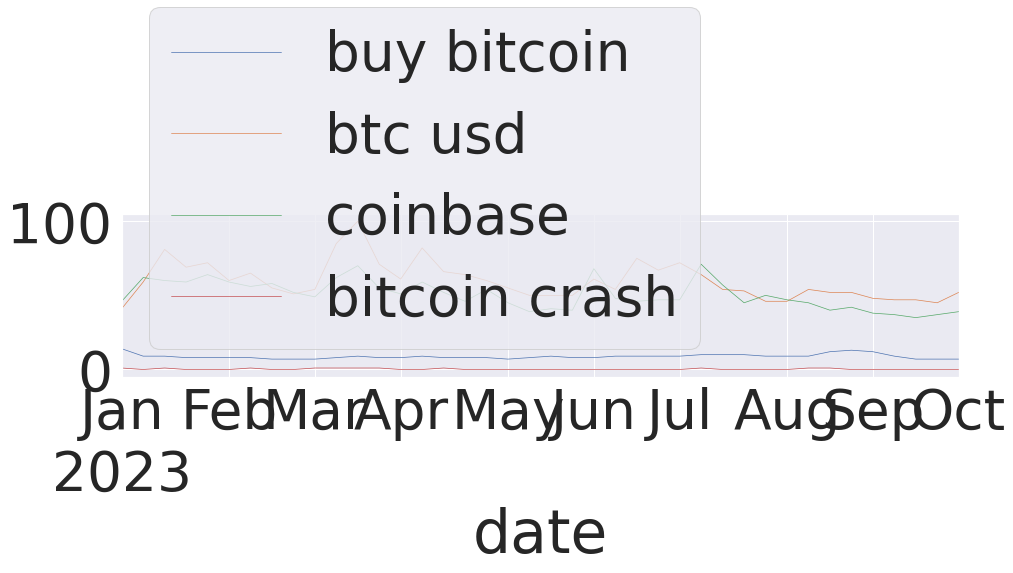

In [21]:
df_google_trends.plot(figsize=(15, 3), lw=.7)

In [82]:
import yfinance as yf
#df2 =yf.download(tickers='BTC-JPY', period = 'max', interval = '1d')
df2 =yf.download(tickers='BTC-JPY', period = 'ytd', interval = '1d')
import talib as ta
df2['EMA2'] = ta.EMA(df2['Close'].values, timeperiod=2)
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA2
Date,,,,,,,
2023-01-01,2169680.50,2174429.75,2166182.25,2176655.25,2176655.25,1210327299919,NaN
2023-01-02,2176711.50,2194497.75,2169686.00,2182750.75,2182750.75,1582315548856,2.179703e+06
2023-01-03,2182800.00,2176679.25,2174724.25,2190040.25,2190040.25,1825453445195,2.186594e+06
2023-01-04,2190086.00,2247226.00,2182748.00,2230174.25,2230174.25,2436287528506,2.215648e+06
2023-01-05,2230205.25,2227512.50,2243198.50,2244736.50,2244736.50,1825569691667,2.235040e+06
...,...,...,...,...,...,...,...
2023-10-09,4174073.75,4193546.50,4139600.50,4166951.50,4166951.50,1180924661021,4.165843e+06
2023-10-10,4166859.50,4174356.75,4060855.00,4091625.00,4091625.00,1781157517060,4.116364e+06
2023-10-11,4092444.25,4126709.75,4060538.75,4071075.00,4071075.00,1482320071271,4.086171e+06


In [83]:
df2['diff_price'] = df2['Close'].diff()
df2

,Open,High,Low,Close,Adj Close,Volume,EMA2,diff_price
Date,,,,,,,,
2023-01-01,2169680.50,2174429.75,2166182.25,2176655.25,2176655.25,1210327299919,NaN,NaN
2023-01-02,2176711.50,2194497.75,2169686.00,2182750.75,2182750.75,1582315548856,2.179703e+06,6095.50
2023-01-03,2182800.00,2176679.25,2174724.25,2190040.25,2190040.25,1825453445195,2.186594e+06,7289.50
2023-01-04,2190086.00,2247226.00,2182748.00,2230174.25,2230174.25,2436287528506,2.215648e+06,40134.00
2023-01-05,2230205.25,2227512.50,2243198.50,2244736.50,2244736.50,1825569691667,2.235040e+06,14562.25
...,...,...,...,...,...,...,...,...
2023-10-09,4174073.75,4193546.50,4139600.50,4166951.50,4166951.50,1180924661021,4.165843e+06,-6698.50
2023-10-10,4166859.50,4174356.75,4060855.00,4091625.00,4091625.00,1781157517060,4.116364e+06,-75326.50
2023-10-11,4092444.25,4126709.75,4060538.75,4071075.00,4071075.00,1482320071271,4.086171e+06,-20550.00


In [84]:
df_concat = pd.concat([df2, df_google_trends,diff3], axis=1)

In [85]:
#df_concat = df_concat.rename(columns={'Unnamed: 0': 'Col_1'})
df_concat
#df_google_trends

,Open,High,Low,Close,Adj Close,Volume,EMA2,diff_price,buy bitcoin,btc usd,coinbase,bitcoin crash,isPartial,difference
2023-01-01,2169680.50,2174429.75,2166182.25,2176655.25,2176655.25,1210327299919,NaN,NaN,14.0,41.0,46.0,1.0,False,-5.0
2023-01-02,2176711.50,2194497.75,2169686.00,2182750.75,2182750.75,1582315548856,2.179703e+06,6095.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,2182800.00,2176679.25,2174724.25,2190040.25,2190040.25,1825453445195,2.186594e+06,7289.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,2190086.00,2247226.00,2182748.00,2230174.25,2230174.25,2436287528506,2.215648e+06,40134.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,2230205.25,2227512.50,2243198.50,2244736.50,2244736.50,1825569691667,2.235040e+06,14562.25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,4174073.75,4193546.50,4139600.50,4166951.50,4166951.50,1180924661021,4.165843e+06,-6698.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-10,4166859.50,4174356.75,4060855.00,4091625.00,4091625.00,1781157517060,4.116364e+06,-75326.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-11,4092444.25,4126709.75,4060538.75,4071075.00,4071075.00,1482320071271,4.086171e+06,-20550.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-12,4071232.00,4084489.75,3965852.50,4005032.75,4005032.75,2034027166182,4.032079e+06,-66042.25,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_concat

,Open,High,Low,Close,Adj Close,Volume,EMA2,diff_price,buy bitcoin,btc usd,coinbase,bitcoin crash,isPartial,difference
2023-01-01,2169680.50,2174429.75,2166182.25,2176655.25,2176655.25,1210327299919,NaN,NaN,14.0,41.0,46.0,1.0,False,-5.0
2023-01-02,2176711.50,2194497.75,2169686.00,2182750.75,2182750.75,1582315548856,2.179703e+06,6095.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,2182800.00,2176679.25,2174724.25,2190040.25,2190040.25,1825453445195,2.186594e+06,7289.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,2190086.00,2247226.00,2182748.00,2230174.25,2230174.25,2436287528506,2.215648e+06,40134.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,2230205.25,2227512.50,2243198.50,2244736.50,2244736.50,1825569691667,2.235040e+06,14562.25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,4174073.75,4193546.50,4139600.50,4166951.50,4166951.50,1180924661021,4.165843e+06,-6698.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-10,4166859.50,4174356.75,4060855.00,4091625.00,4091625.00,1781157517060,4.116364e+06,-75326.50,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-11,4092444.25,4126709.75,4060538.75,4071075.00,4071075.00,1482320071271,4.086171e+06,-20550.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-12,4071232.00,4084489.75,3965852.50,4005032.75,4005032.75,2034027166182,4.032079e+06,-66042.25,NaN,NaN,NaN,NaN,NaN,NaN


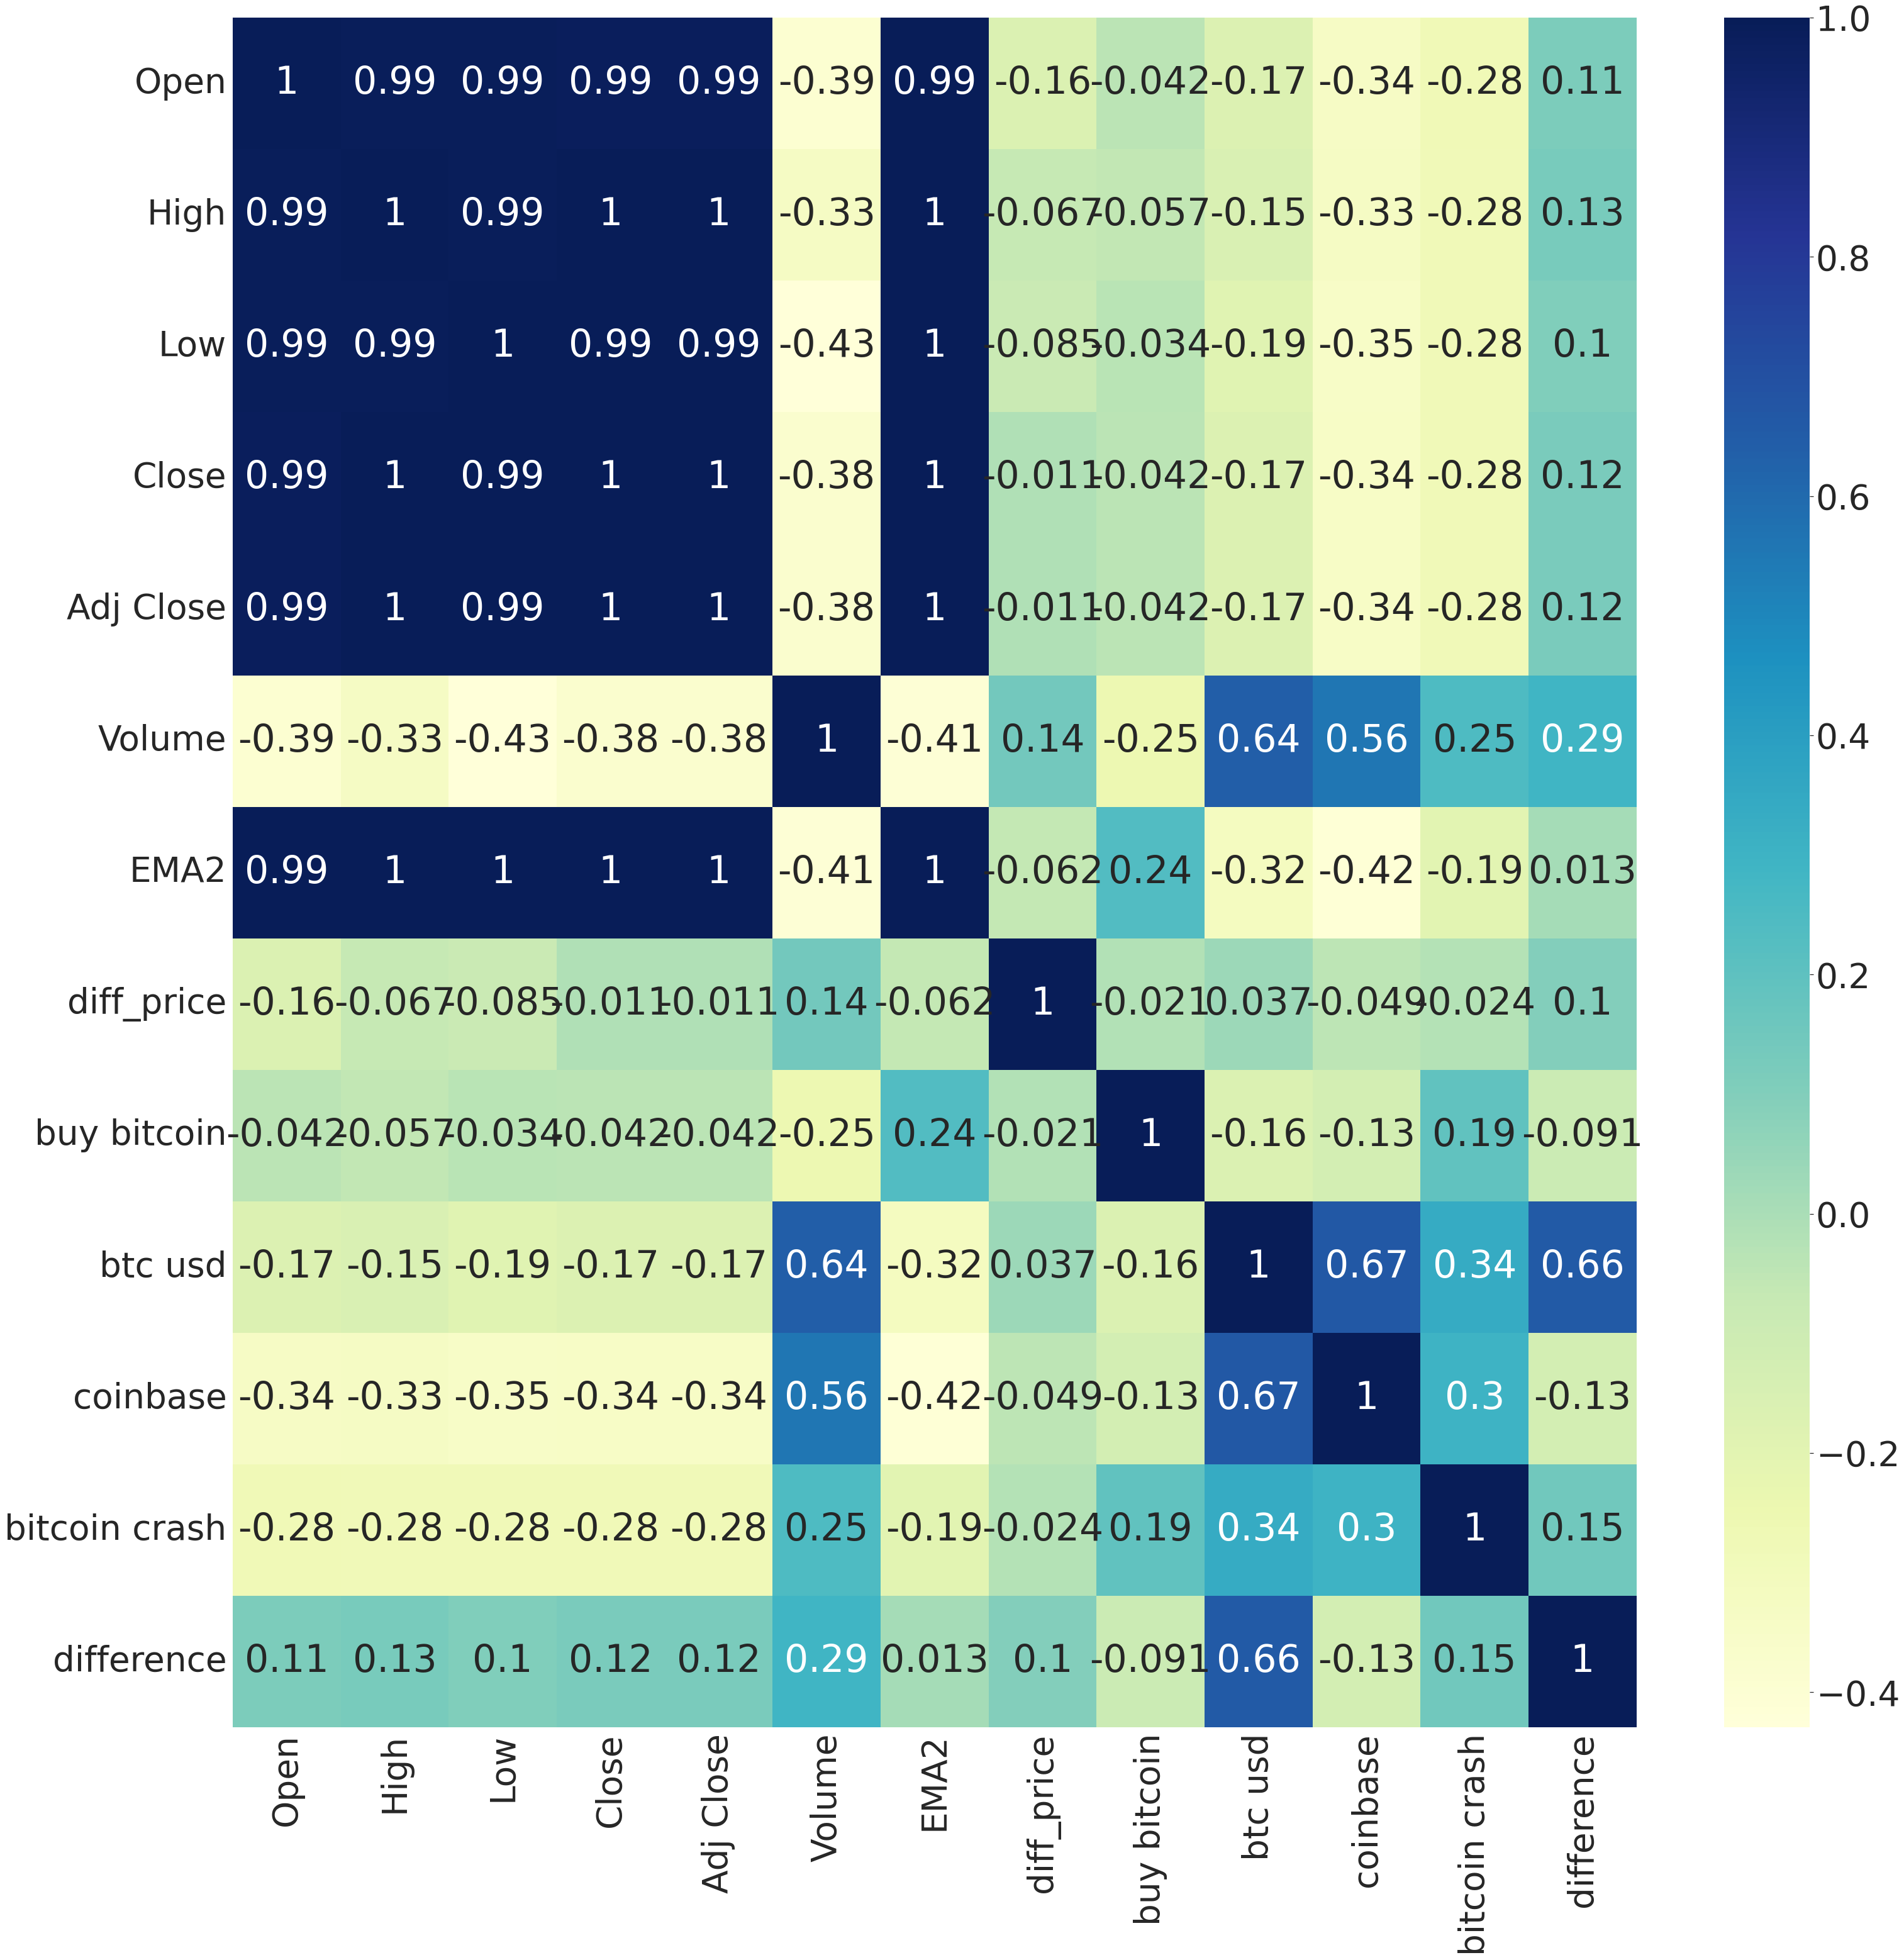

In [87]:
import matplotlib.pyplot as mp
import seaborn as sns
mp.figure(figsize=(50,50))
sns.set(font_scale=5)
dataplot=sns.heatmap(df_concat.corr(), cmap="YlGnBu", annot=True)
mp.show()


/tmp/ipykernel_2079/1635580344.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax= fig.gca(projection='3d')


'[OK!]'

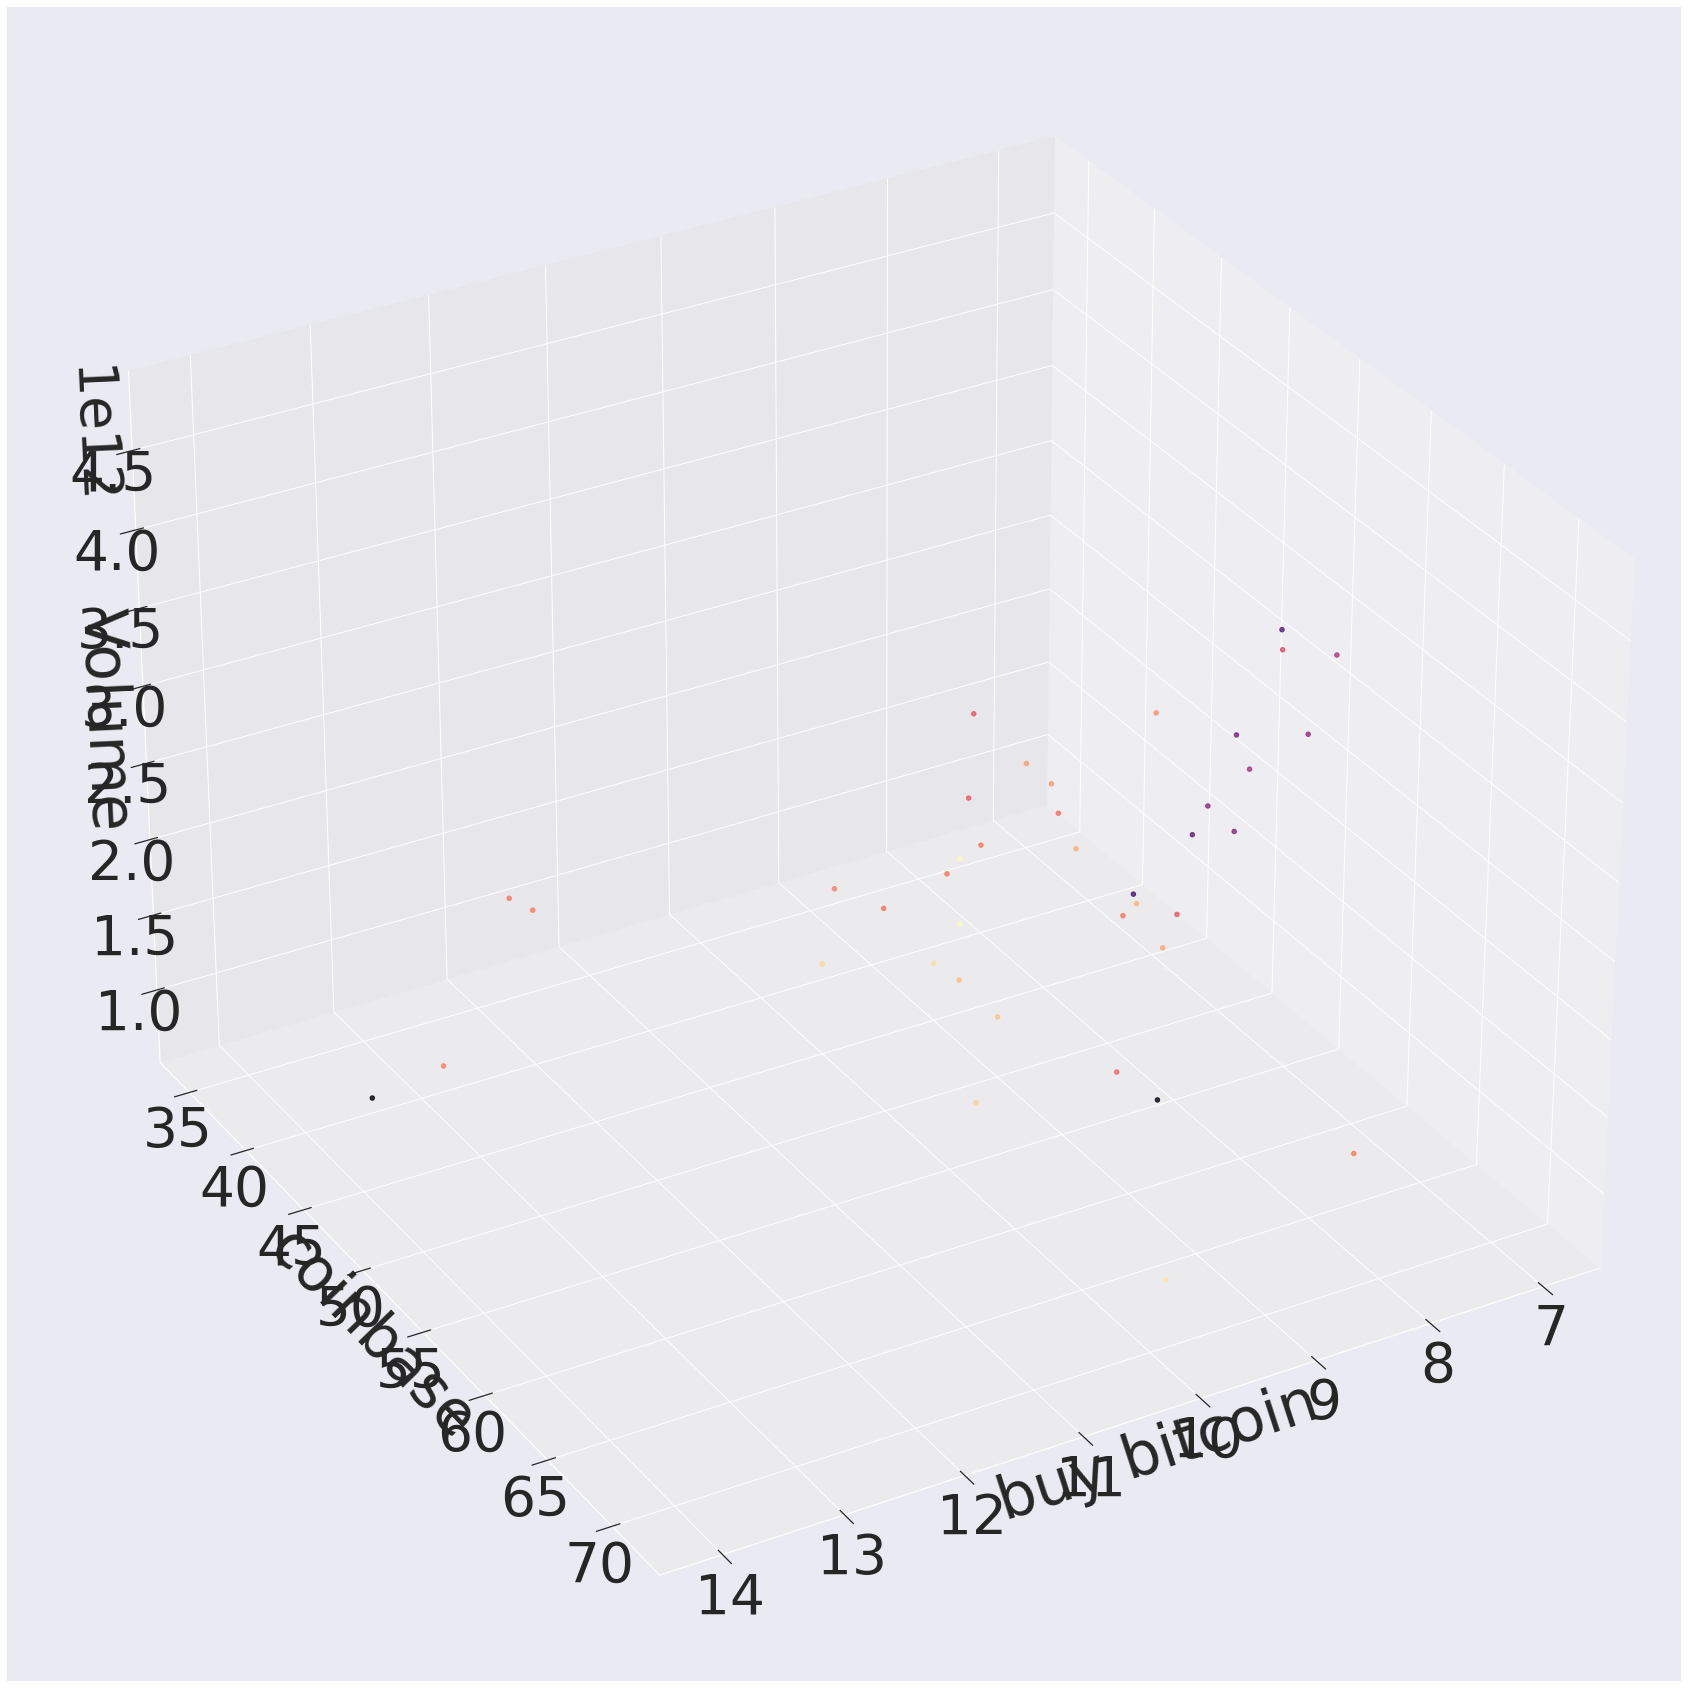

In [88]:
from pyxll import xl_func, plot
import matplotlib.pyplot as plt
import seaborn as sns

def plot_3d(df):
    fig=plt.figure(facecolor='white', figsize=(30,40))
    my_cmap=plt.get_cmap('hsv')
    #my_cmap=
    ax= fig.gca(projection='3d')
    
    ax.scatter(df['buy bitcoin'],df['coinbase'],df['Volume'], c=df['Close'], cmap='magma', alpha=0.8)    
    ax.view_init(30,60)
    ax.set_xlabel('buy bitcoin')
    ax.set_ylabel('coinbase')
    ax.set_zlabel('Volume')

    
    
    
    #    ax.set_xlim([1,100000])
    return "[OK!]"

plot_3d(df_concat)

In [89]:
#    df['EMA2'] = ta.EMA(df['Close'].values, timeperiod=2)


In [90]:
df_concat=df_concat.fillna(0)

/home/shirosuke/miniconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


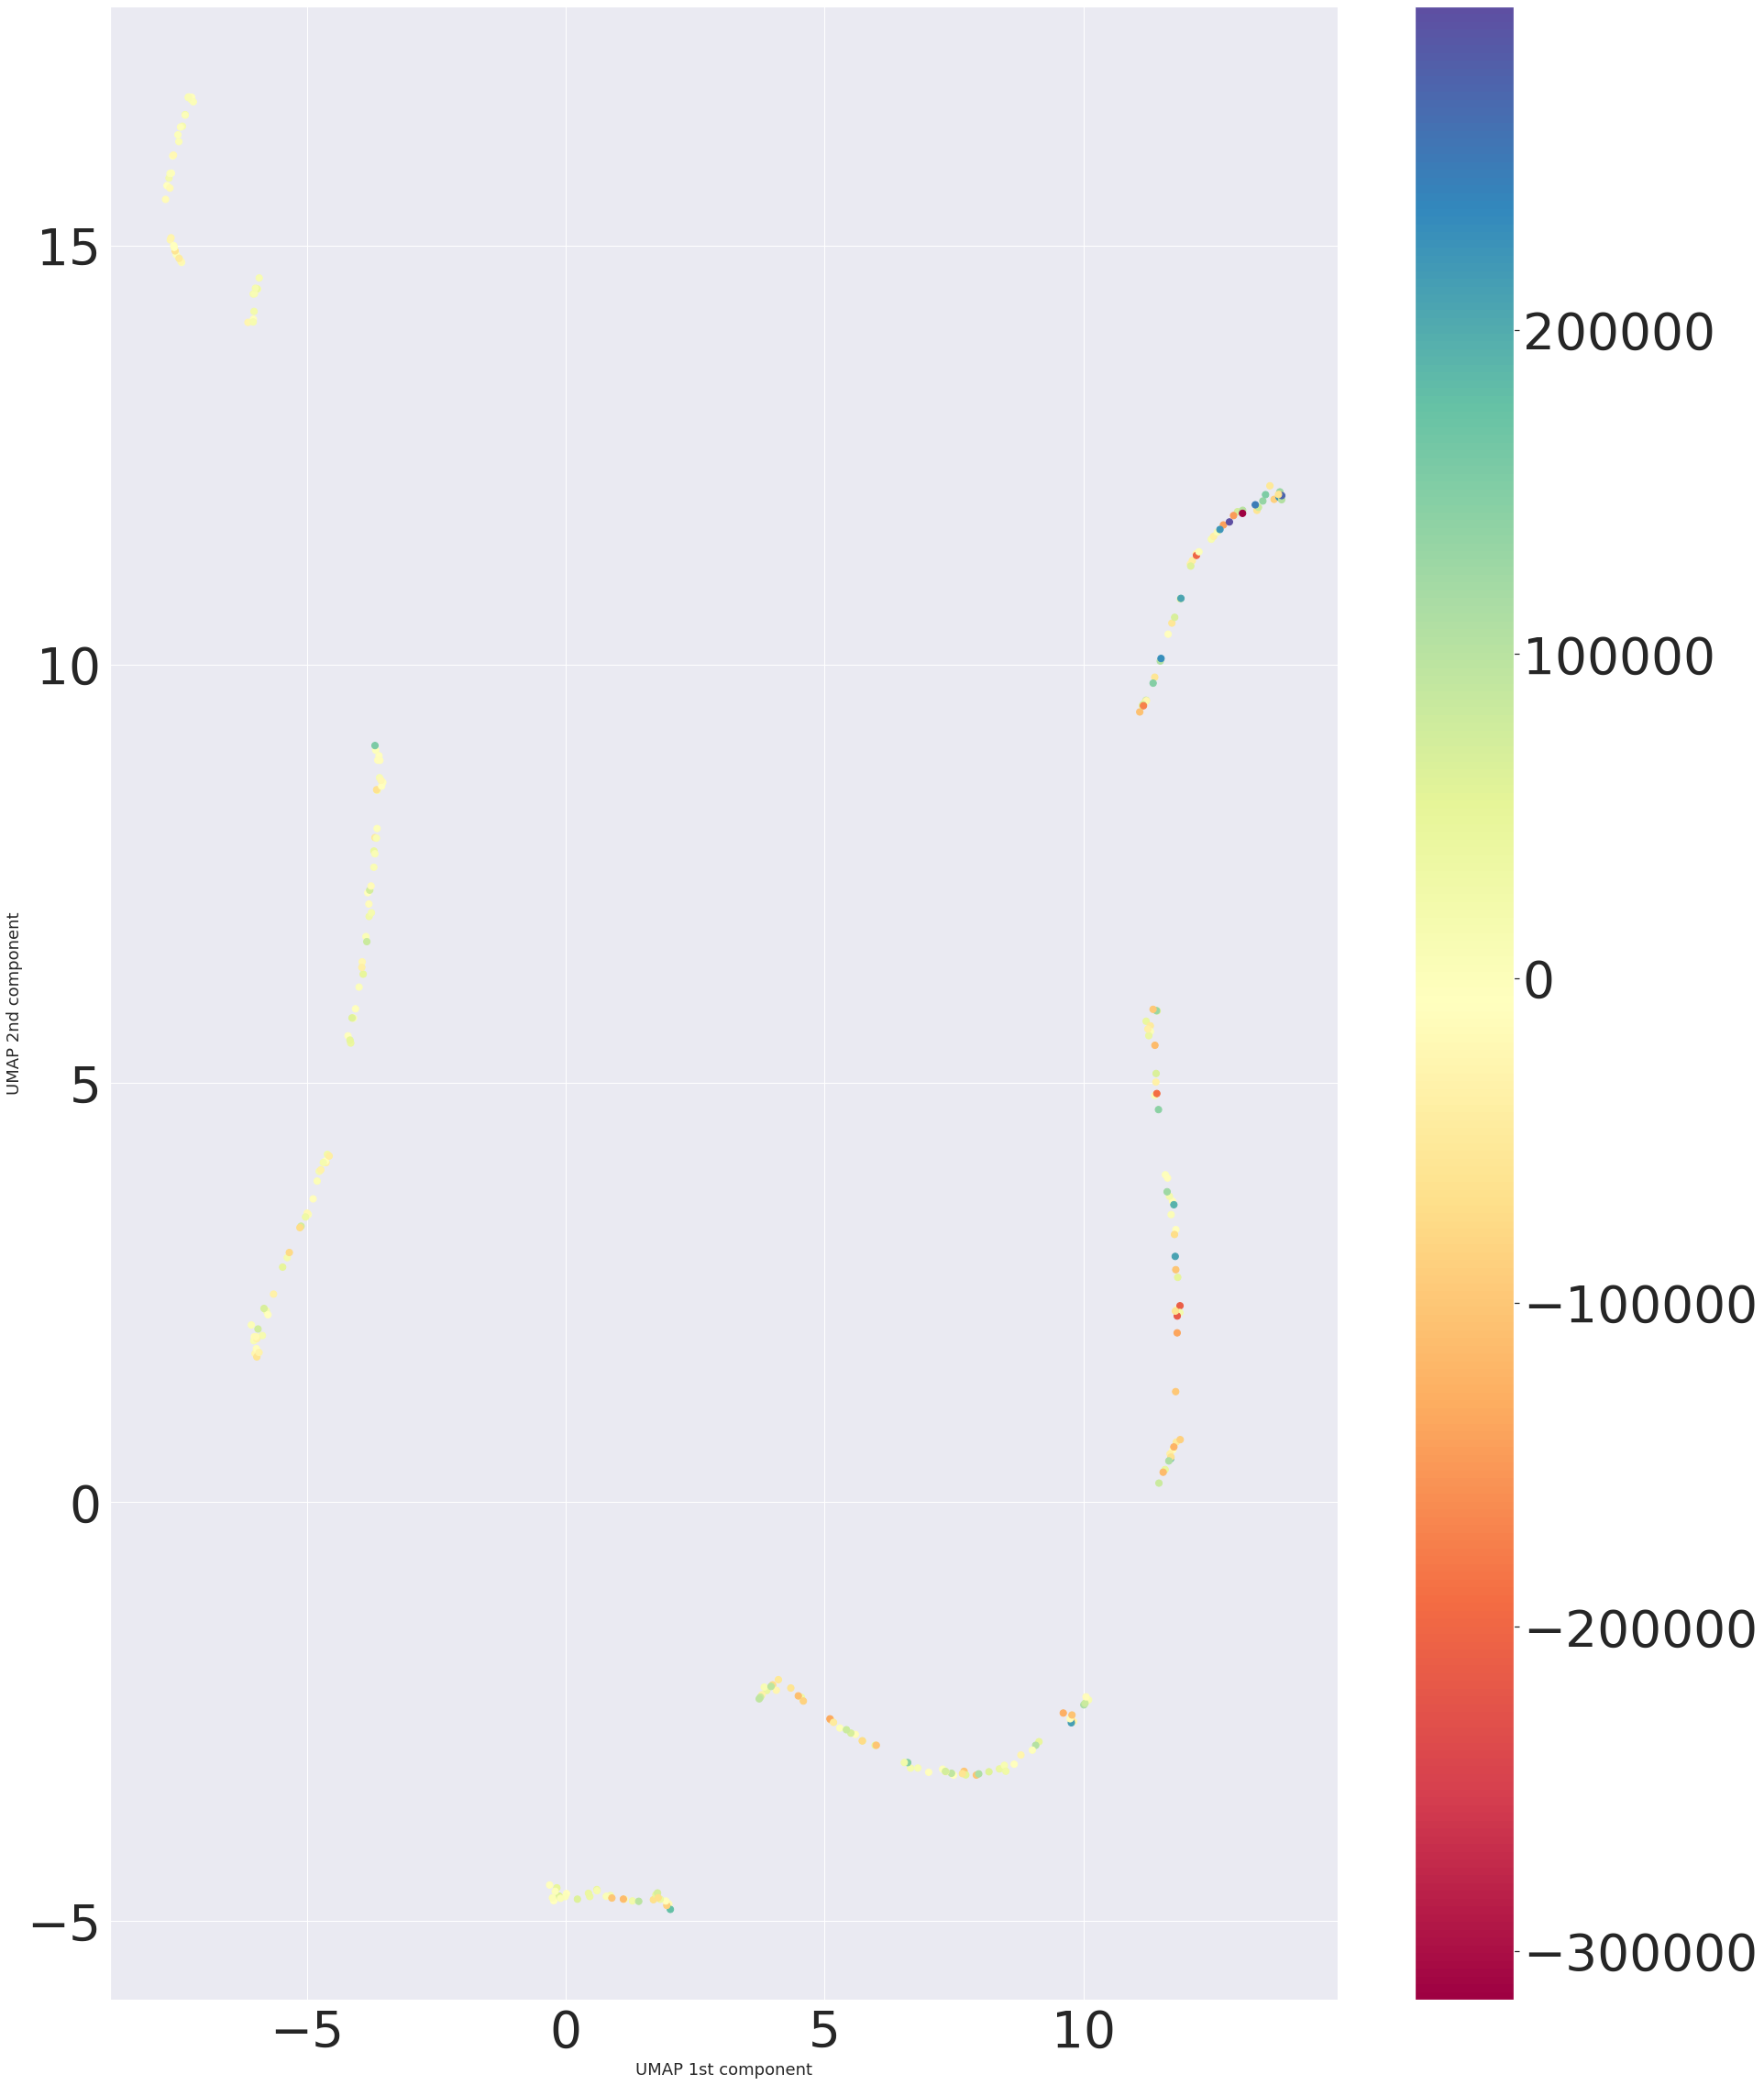

In [91]:
import umap
from umap.umap_ import UMAP
import matplotlib.pyplot as plt

reducer = UMAP(n_components=2, random_state=0)
reducer.fit(df_concat)
embedding = reducer.transform(df_concat)

fig=plt.figure(facecolor='white', figsize=(30,40))
#    my_cmap=plt.get_cmap('hsv')
#    ax= fig.gca(projection='3d')
#    ax.scatter(df['buy bitcoin'],df['coinbase'],df['Volume'], c=df['Close'], cmap='magma', alpha=0.8)    

#plt=fig.gca(projection='3d')

#plt.scatter(embedding[:, 0], embedding[:, 1], c=df_concat['Close'], cmap='Spectral', s=6)
ax=plt.scatter(embedding[:, 0], embedding[:, 1], c=df_concat['diff_price'], cmap='Spectral', s=50)
#ax=plt.scatter(embedding[:, 0],embedding[:, 1], df_concat['Close'], c=df_concat['diff_price'], cmap='Spectral', s=25)


#plt.set_xlabel('UMAP 1st component', fontsize=18)
#plt.set_ylabel('UMAP 2nd component', fontsize=18)
#plt.set_zlabel('Close', fontsize=18)

plt.xlabel('UMAP 1st component', fontsize=18)
plt.ylabel('UMAP 2nd component', fontsize=18)


#plt.colorbar()
#plt.title('UMAP ', fontsize=18)
fig.colorbar(ax)
plt.show()

In [30]:
embedding

array([[ 2.6814985 , 15.86395   ],
       [-4.6496844 ,  8.618864  ],
       [-6.6530986 ,  3.478813  ],
       [ 7.5213056 , -4.6744843 ],
       [-6.766132  ,  3.3863542 ],
       [-1.3861178 , -1.1721712 ],
       [ 4.0983095 , 16.86377   ],
       [-1.641771  , 11.055468  ],
       [ 7.5852423 , -4.738787  ],
       [ 3.3009567 , -2.0534558 ],
       [ 7.3730435 , -4.5235376 ],
       [12.809273  , 11.777964  ],
       [11.726669  ,  9.364066  ],
       [13.231931  , 12.203463  ],
       [ 7.697223  , -4.853378  ],
       [12.366851  ,  7.1972547 ],
       [13.548373  ,  5.356741  ],
       [11.852272  ,  9.963957  ],
       [14.912188  ,  2.5307415 ],
       [11.709599  ,  9.350595  ],
       [12.466613  , 11.330747  ],
       [13.637091  ,  5.2482147 ],
       [12.292098  ,  7.37671   ],
       [12.527733  ,  7.026129  ],
       [12.036914  , 10.361804  ],
       [12.519515  ,  7.010835  ],
       [13.022879  ,  6.2186217 ],
       [-1.2119536 , -1.21852   ],
       [11.672112  ,

In [31]:
!pip uninstall -y umap
!pip install umap-learn

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [33]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 